# week 5
## convolutional neural networks CNN
### part 2: train the cnn on simple dataset

data set from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # Normalize pixel values
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Step 2: Define a basic CNN model
def build_cnn():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",

    metrics=["accuracy"])
    return model

In [4]:
# Step 3: Train and evaluate the CNN
cnn_model = build_cnn()
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1297 - accuracy: 0.9600 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0411 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0370 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0297 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0294 - val_ac

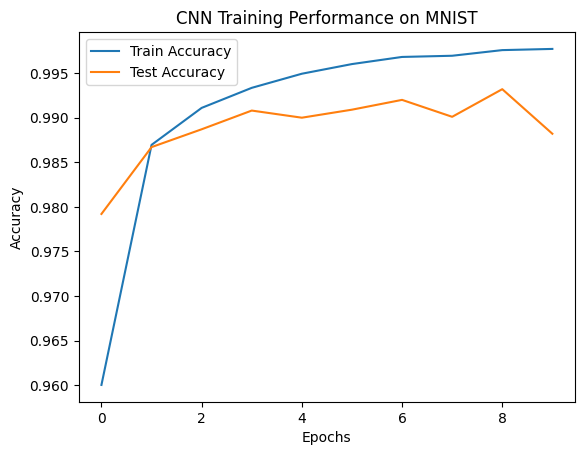

In [5]:
# Step 4: Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Performance on MNIST")
plt.legend()
plt.show()

In [6]:
# Step 5: Evaluate the final model
final_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f"Final Test Accuracy: {final_accuracy:.2f}%")

Final Test Accuracy: 98.82%
